In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# train.json 파일 경로 설정
json_path = '/data/ephemeral/home/dataset/train.json'

# JSON 파일 로드
with open(json_path) as f:
    data = json.load(f)

# annotations와 images 정보 추출
annotations = data['annotations']
images = data['images']

클래스 분포 분석 

Text(0, 0.5, 'Frequency')

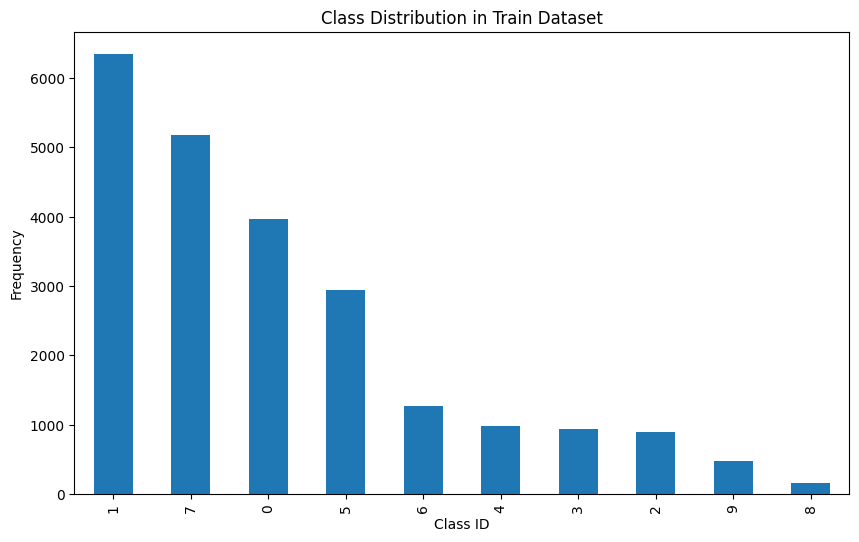

In [2]:
classes = [ann['category_id'] for ann in annotations]

plt.figure(figsize=(10, 6))
class_counts = pd.Series(classes).value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Class ID')
plt.ylabel('Frequency')

Bounding Box 분포 분석 

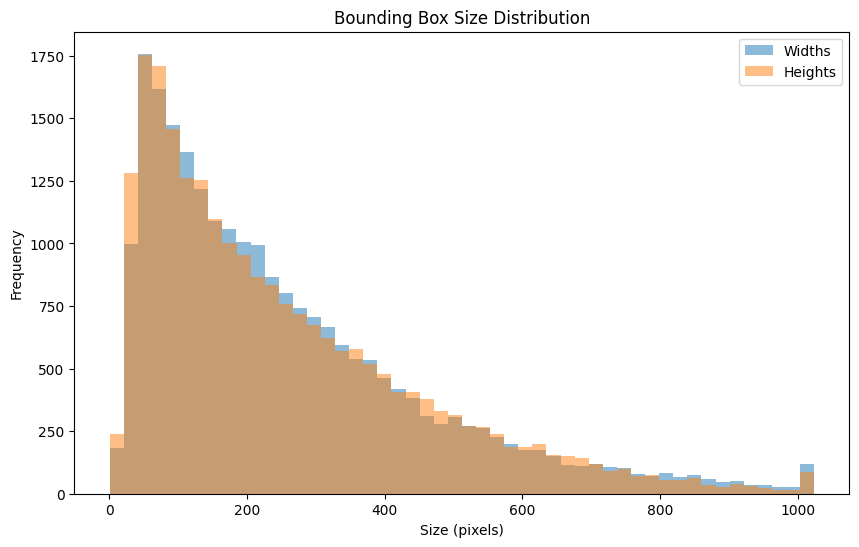

In [3]:
bbox_sizes = [(ann['bbox'][2], ann['bbox'][3]) for ann in annotations]  # bbox 형식: [x, y, width, height]
widths, heights = zip(*bbox_sizes)

plt.figure(figsize=(10, 6))
plt.hist(widths, bins=50, alpha=0.5, label='Widths')
plt.hist(heights, bins=50, alpha=0.5, label='Heights')
plt.title('Bounding Box Size Distribution')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()

세로로 긴 Bounding Box, 가로로 긴 Bounding Box 분포 

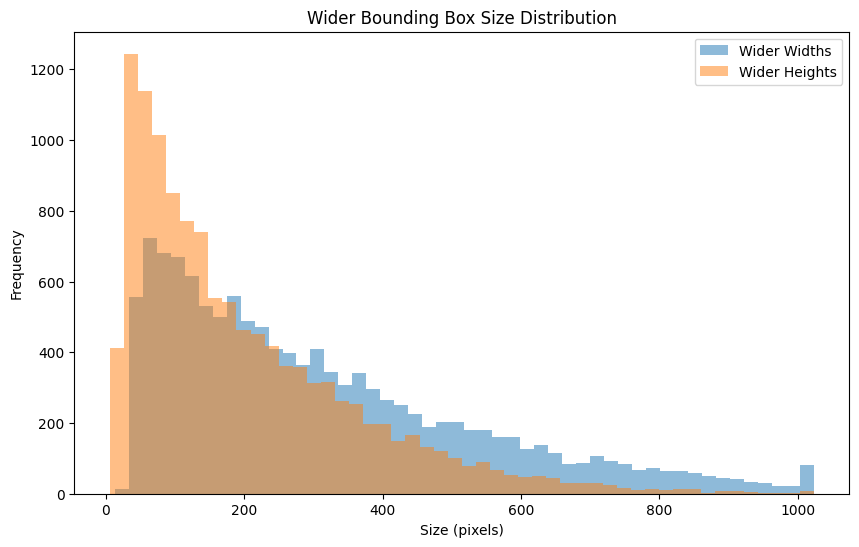

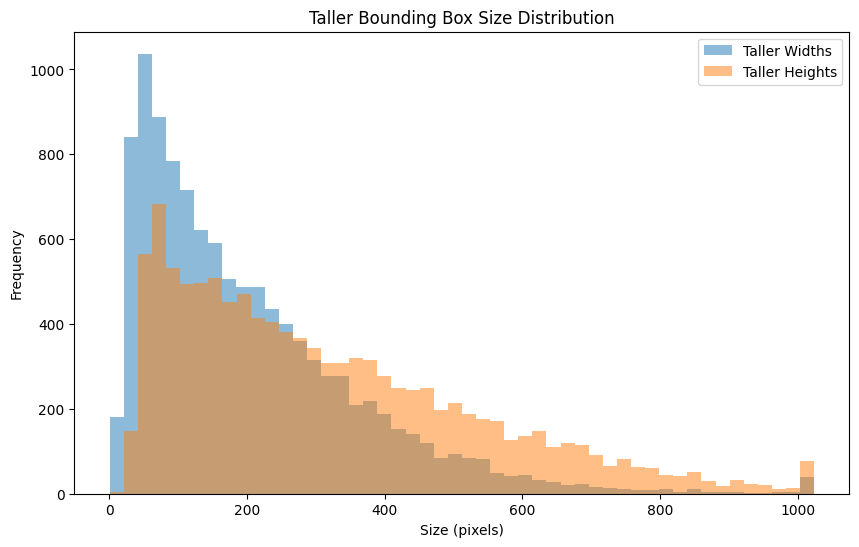

In [4]:
# annotations에서 바운딩 박스 정보 추출 (x, y, width, height)
bbox_sizes = [(ann['bbox'][2], ann['bbox'][3]) for ann in annotations]

# 가로로 긴 바운딩 박스와 세로로 긴 바운딩 박스 구분
wider_bboxes = [(w, h) for w, h in bbox_sizes if w > h]
taller_bboxes = [(w, h) for w, h in bbox_sizes if w <= h]

# 가로로 긴 바운딩 박스 시각화
wider_widths, wider_heights = zip(*wider_bboxes)
plt.figure(figsize=(10, 6))
plt.hist(wider_widths, bins=50, alpha=0.5, label='Wider Widths')
plt.hist(wider_heights, bins=50, alpha=0.5, label='Wider Heights')
plt.title('Wider Bounding Box Size Distribution')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 세로로 긴 바운딩 박스 시각화
taller_widths, taller_heights = zip(*taller_bboxes)
plt.figure(figsize=(10, 6))
plt.hist(taller_widths, bins=50, alpha=0.5, label='Taller Widths')
plt.hist(taller_heights, bins=50, alpha=0.5, label='Taller Heights')
plt.title('Taller Bounding Box Size Distribution')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()

이미지당 객체 수 시각화

([<matplotlib.axis.XTick at 0x7fb3576ccd30>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

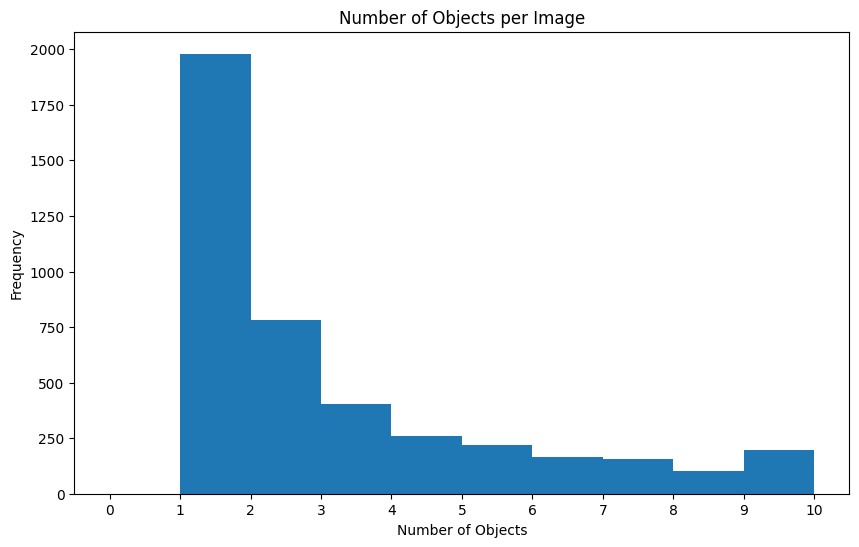

In [5]:
image_object_counts = pd.Series([ann['image_id'] for ann in annotations]).value_counts()

plt.figure(figsize=(10, 6))
plt.hist(image_object_counts, bins=10, range=(0, 10))
plt.title('Number of Objects per Image')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')
plt.xticks(range(0, 11, 1))  # 가로축을 1단위로 설정

In [6]:
!pwd


/data/ephemeral/home/yj/level2-objectdetection-cv-14/EDA_data
